<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(3_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,85.891097,88.785962,37.460015,75.469946,5139.757342,5437.364361,649.550386,4787.813974
1,0.0,1.0,42.305361,44.766315,83.097611,30.050008,1482.203117,1692.422411,-49.629195,1742.051606
2,0.0,2.0,64.595675,48.132496,97.286807,35.502137,-787.984873,-532.467757,371.051686,-903.519443
3,0.0,3.0,99.011038,51.069617,39.826426,63.421804,1043.071747,1306.400633,2873.351166,-1566.950533
4,0.0,4.0,55.266628,34.673605,33.153463,78.597786,1251.986479,1463.677961,471.814247,991.863714
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,85.217111,91.386032,60.763003,42.941526,5733.088136,6023.395807,2491.746139,3531.649668
19996,999.0,16.0,97.311907,34.061673,83.665479,48.223963,1212.728874,1485.991896,258.451408,1227.540489
19997,999.0,17.0,39.435322,82.615619,95.199948,56.289296,-271.097665,12.442520,559.258808,-546.816288
19998,999.0,18.0,35.707816,28.293493,29.086409,71.749694,539.432135,714.269546,29.953594,684.315952


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    85.891097  88.785962  37.460015  75.469946  5139.757342   
      1.0    42.305361  44.766315  83.097611  30.050008  1482.203117   
      2.0    64.595675  48.132496  97.286807  35.502137  -787.984873   
      3.0    99.011038  51.069617  39.826426  63.421804  1043.071747   
      4.0    55.266628  34.673605  33.153463  78.597786  1251.986479   
...                ...        ...        ...        ...          ...   
999.0 15.0   85.217111  91.386032  60.763003  42.941526  5733.088136   
      16.0   97.311907  34.061673  83.665479  48.223963  1212.728874   
      17.0   39.435322  82.615619  95.199948  56.289296  -271.097665   
      18.0   35.707816  28.293493  29.086409  71.749694   539.432135   
      19.0   99.324471  72.745876  54.266547  82.116573  1806.917156   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0    5437.364361   649.550386  4787.813974  
      1.0    1692.422411   -49.629195  1742.051606  
      2.0    -532.467757   371.051686  -903.519443  
      3.0    1306.400633  2873.351166 -1566.950533  
      4.0    1463.677961   471.814247   991.863714  
...                  ...          ...          ...  
999.0 15.0   6023.395807  2491.746139  3531.649668  
      16.0   1485.991896   258.451408  1227.540489  
      17.0     12.442520   559.258808  -546.816288  
      18.0    714.269546    29.953594   684.315952  
      19.0   2125.370623  2027.820631    97.549992  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    85.891097  88.785962  37.460015  75.469946  5139.757342   
      1.0    42.305361  44.766315  83.097611  30.050008  1482.203117   
      2.0    64.595675  48.132496  97.286807  35.502137  -787.984873   
      3.0    99.011038  51.069617  39.826426  63.421804  1043.071747   
      4.0    55.266628  34.673605  33.153463  78.597786  1251.986479   
...                ...        ...        ...        ...          ...   
999.0 15.0   85.217111  91.386032  60.763003  42.941526  5733.088136   
      16.0   97.311907  34.061673  83.665479  48.223963  1212.728874   
      17.0   39.435322  82.615619  95.199948  56.289296  -271.097665   
      18.0   35.707816  28.293493  29.086409  71.749694   539.432135   
      19.0   99.324471  72.745876  54.266547  82.116573  1806.917156   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0    5437.364361   649.550386  4787.813974  
      1.0    1692.422411   -49.629195  1742.051606  
      2.0    -532.467757   371.051686  -903.519443  
      3.0    1306.400633  2873.351166 -1566.950533  
      4.0    1463.677961   471.814247   991.863714  
...                  ...          ...          ...  
999.0 15.0   6023.395807  2491.746139  3531.649668  
      16.0   1485.991896   258.451408  1227.540489  
      17.0     12.442520   559.258808  -546.816288  
      18.0    714.269546    29.953594   684.315952  
      19.0   2125.370623  2027.820631    97.549992  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,85.891097,88.785962,37.460015,75.469946,5139.757342,5437.364361,649.550386,4787.813974
1,0.0,1.0,42.305361,44.766315,83.097611,30.050008,1482.203117,1692.422411,-49.629195,1742.051606
2,0.0,2.0,64.595675,48.132496,97.286807,35.502137,-787.984873,-532.467757,371.051686,-903.519443
3,0.0,3.0,99.011038,51.069617,39.826426,63.421804,1043.071747,1306.400633,2873.351166,-1566.950533
4,0.0,4.0,55.266628,34.673605,33.153463,78.597786,1251.986479,1463.677961,471.814247,991.863714
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,85.217111,91.386032,60.763003,42.941526,5733.088136,6023.395807,2491.746139,3531.649668
19996,999.0,16.0,97.311907,34.061673,83.665479,48.223963,1212.728874,1485.991896,258.451408,1227.540489
19997,999.0,17.0,39.435322,82.615619,95.199948,56.289296,-271.097665,12.442520,559.258808,-546.816288
19998,999.0,18.0,35.707816,28.293493,29.086409,71.749694,539.432135,714.269546,29.953594,684.315952


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    85.891097  88.785962  37.460015  75.469946  5139.757342   
      1.0    42.305361  44.766315  83.097611  30.050008  1482.203117   
      2.0    64.595675  48.132496  97.286807  35.502137  -787.984873   
      3.0    99.011038  51.069617  39.826426  63.421804  1043.071747   
      4.0    55.266628  34.673605  33.153463  78.597786  1251.986479   
...                ...        ...        ...        ...          ...   
999.0 15.0   85.217111  91.386032  60.763003  42.941526  5733.088136   
      16.0   97.311907  34.061673  83.665479  48.223963  1212.728874   
      17.0   39.435322  82.615619  95.199948  56.289296  -271.097665   
      18.0   35.707816  28.293493  29.086409  71.749694   539.432135   
      19.0   99.324471  72.745876  54.266547  82.116573  1806.917156   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0    5437.364361   649.550386  4787.813974  
      1.0    1692.422411   -49.629195  1742.051606  
      2.0    -532.467757   371.051686  -903.519443  
      3.0    1306.400633  2873.351166 -1566.950533  
      4.0    1463.677961   471.814247   991.863714  
...                  ...          ...          ...  
999.0 15.0   6023.395807  2491.746139  3531.649668  
      16.0   1485.991896   258.451408  1227.540489  
      17.0     12.442520   559.258808  -546.816288  
      18.0    714.269546    29.953594   684.315952  
      19.0   2125.370623  2027.820631    97.549992  

[20000 rows x 8 columns]

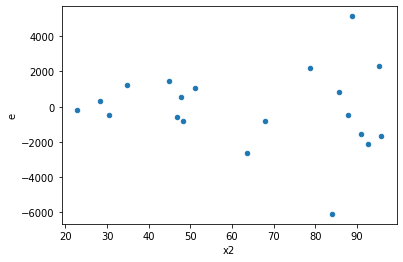

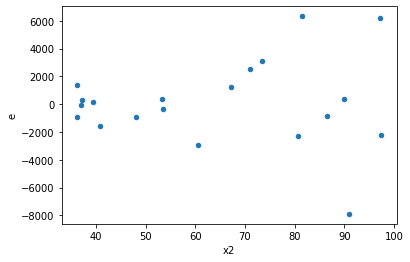

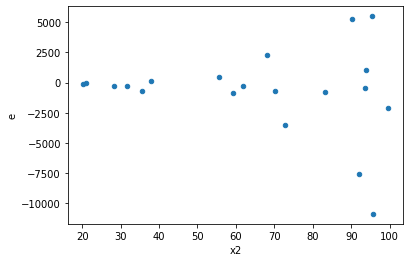

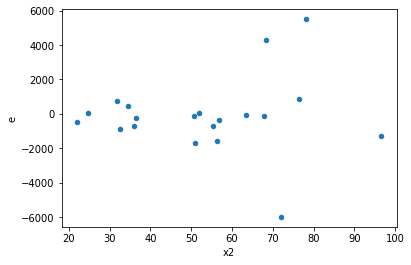

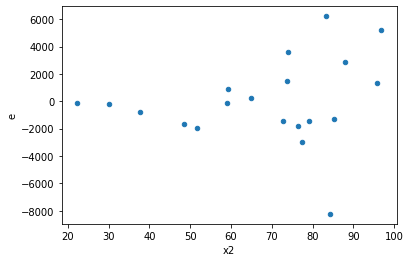

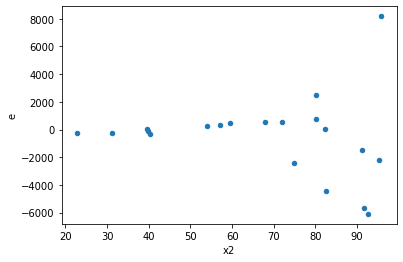

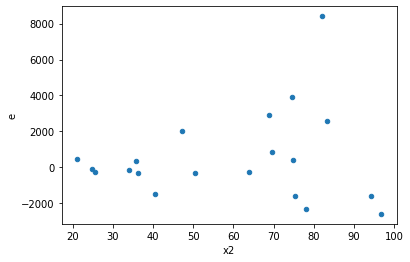

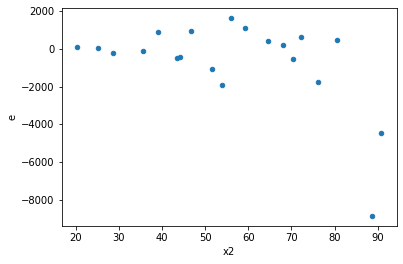

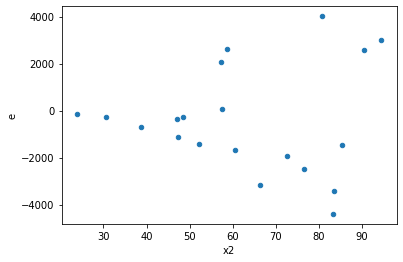

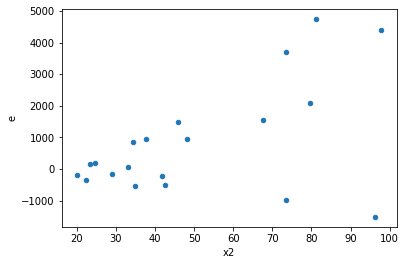

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,16428124.28864863,48871920.30081232,2738020.7147747716,8145320.050135386,2.974893508358799,0.21037611004981116,0.8948119449750944,0.10518805502490558,Reject001=1 : Homoscedasticity
2.0,2.0,10.0,112639.77155602242,215750080.44752565,56319.88577801121,21575008.044752564,383.07975498728774,7.100273702320692e-10,0.9999999996449863,3.550136851160346e-10,Reject001=0 : Heteroscedasticity
3.0,3.0,9.0,278602.6077507531,61971557.33680121,92867.53591691771,6885728.592977912,74.14570145522228,2.2957738903262026e-06,0.9999988521130548,1.1478869451631013e-06,Reject001=0 : Heteroscedasticity
4.0,8.0,4.0,17544896.884631395,48582116.741567075,2193112.1105789244,12145529.185391769,5.538033886551138,0.1158106986406906,0.9420946506796547,0.0579053493203453,Reject001=1 : Homoscedasticity
7.0,7.0,5.0,13819408.965405006,41441497.51125089,1974201.2807721437,8288299.502250178,4.198305199664587,0.13346928859065432,0.9332653557046728,0.06673464429532716,Reject001=1 : Homoscedasticity
13.0,4.0,8.0,2458182.1902957694,18791743.629579954,614545.5475739423,2348967.953697494,3.822284553147569,0.10097185765655858,0.9495140711717207,0.05048592882827929,Reject001=1 : Homoscedasticity
15.0,4.0,8.0,602997.1572277099,51091385.88006813,150749.28930692747,6386423.235008516,42.364532956475024,3.981293057453428e-05,0.9999800935347127,1.990646528726714e-05,Reject001=0 : Heteroscedasticity
16.0,5.0,7.0,13338223.635842314,18184066.68505993,2667644.7271684627,2597723.8121514185,0.9737892702484184,0.9870975817925978,0.5064512091037011,0.4935487908962989,Reject001=1 : Homoscedasticity
17.0,7.0,5.0,2428509.310930556,11043945.566647686,346929.901561508,2208789.113329537,6.366672643055346,0.05831147192000996,0.970844264039995,0.02915573596000498,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,16428124.28864863,48871920.30081232,2738020.7147747716,8145320.050135386,2.974893508358799,0.21037611004981116,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,54702417.00355575,19494986.855632223,9117069.500592625,3249164.475938704,0.3563825498673124,0.2348230599793181,Reject001=1 : Homoscedasticity
2.0,2.0,10.0,112639.77155602242,215750080.44752565,56319.88577801121,21575008.044752564,383.07975498728774,7.100273702320692e-10,Reject001=0 : Heteroscedasticity
3.0,3.0,9.0,278602.6077507531,61971557.33680121,92867.53591691771,6885728.592977912,74.14570145522228,2.2957738903262026e-06,Reject001=0 : Heteroscedasticity
4.0,8.0,4.0,17544896.884631395,48582116.741567075,2193112.1105789244,12145529.185391769,5.538033886551138,0.1158106986406906,Reject001=1 : Homoscedasticity
5.0,7.0,5.0,48978243.961960375,15336818.558608431,6996891.994565768,3067363.711721686,0.43838946122135314,0.3122297744279373,Reject001=1 : Homoscedasticity
6.0,4.0,8.0,39038546.17458262,7241797.756001532,9759636.543645656,905224.7195001915,0.09275188839789007,0.03591821702285786,Reject001=1 : Homoscedasticity
7.0,7.0,5.0,13819408.965405006,41441497.51125089,1974201.2807721437,8288299.502250178,4.198305199664587,0.13346928859065432,Reject001=1 : Homoscedasticity
8.0,8.0,4.0,82800198.53723697,651231.1308648747,10350024.817154622,162807.78271621867,0.01573018283457382,8.443381120717476e-06,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      724
Reject001=0 : Heteroscedasticity    276
Name: Result_test, dtype: int64